## Supplement 7: Unsupervised Learning

In [45]:
%matplotlib inline
import numpy as np
import pandas as pd
import skimage
import matplotlib.pyplot as plt





### 7.3 Programming Task: Color Quantization using K-Means clustering.

 The goal of this task is to perform color quantization using the K-Means clustering algorithm.

   i\. Implement the K-Means clustering algorithm using Numpy/SciPy.




In [46]:

def K_means_clustering(train_X,num_clusters,max_iterations):
   
   #TODO: Implement the K means algorithm. The input train_X is an array of shape (p,3), where p is the number of pixels in the image.
   np.random.seed(42)
   cluster_centers=train_X[np.random.choice(train_X.shape[0],num_clusters,replace=False)]
   for _ in range(max_iterations):
      distances=np.linalg.norm(train_X[:,np.newaxis]-cluster_centers,axis=2)
      nearest_cluster=np.argmin(distances,axis=1)
      
      new_cluster_centers=np.array([train_X[nearest_cluster==i].mean(axis=0) if np.any(nearest_cluster==i) else cluster_centers[i] for i in range(num_clusters)])
      if np.all(new_cluster_centers==cluster_centers):
         break
      cluster_centers=new_cluster_centers
   return cluster_centers,nearest_cluster


   ii\. Read the given image. Consider each pixel as a 3-dimensional vector and run your K-Means clustering algorithm to get 64 clusters.


In [47]:
#TODO
imag=skimage.io.imread('./sup_7_3_input.jpg')
imag=imag.reshape(-1,3)
cluster_centers,nearest_cluster=K_means_clustering(imag,64,100)

  iii\. Assign each pixel the color value of its nearest cluster center. Visualize the result.

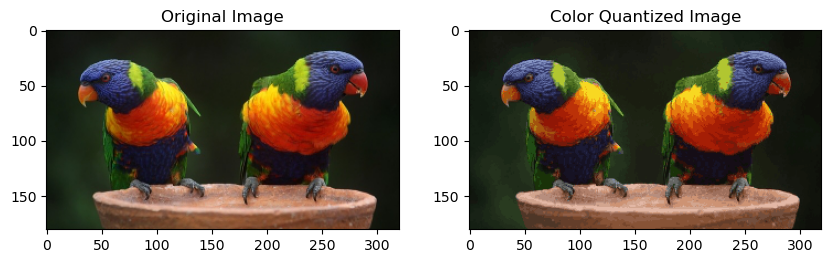

In [48]:
#TODO
imag=skimage.io.imread('./sup_7_3_input.jpg')
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(imag)
ax[0].set_title('Original Image')   
ax[1].imshow(cluster_centers[nearest_cluster].reshape(imag.shape).astype(np.uint8))
ax[1].set_title('Color Quantized Image')
plt.show()

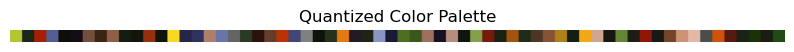

In [49]:
import matplotlib.pyplot as plt

def plot_color_palette(cluster_centers):
    """Visualizes the cluster centers as a color palette."""
    num_colors = cluster_centers.shape[0]
    palette = np.zeros((50, num_colors * 50, 3), dtype=np.uint8)

    for i, color in enumerate(cluster_centers.astype(np.uint8)):
        palette[:, i * 50:(i + 1) * 50, :] = color  # Fill rectangles with cluster colors

    plt.figure(figsize=(10, 2))
    plt.imshow(palette)
    plt.axis("off")
    plt.title("Quantized Color Palette")
    plt.show()

# Visualize the cluster centers
plot_color_palette(cluster_centers)


In [50]:


def compute_psnr(original, quantized):
    """Computes Peak Signal-to-Noise Ratio (PSNR) between two images."""
    mse = np.mean((original - quantized) ** 2)
    if mse == 0:
        return float("inf")  # No difference
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

psnr_value = compute_psnr(imag, cluster_centers[nearest_cluster].reshape(imag.shape))
print(f"PSNR Value: {psnr_value:.2f} dB")


PSNR Value: 32.45 dB
